<a href="https://colab.research.google.com/github/Merllinyazh/Cognorise/blob/main/sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First few rows of the dataset:
             Row ID        Order ID   Ship Date       Ship Mode Customer ID  \
Order Date                                                                   
08-11-2017       1  CA-2017-152156  11-11-2017    Second Class    CG-12520   
08-11-2017       2  CA-2017-152156  11-11-2017    Second Class    CG-12520   
12-06-2017       3  CA-2017-138688  16-06-2017    Second Class    DV-13045   
11-10-2016       4  US-2016-108966  18-10-2016  Standard Class    SO-20335   
11-10-2016       5  US-2016-108966  18-10-2016  Standard Class    SO-20335   

              Customer Name    Segment        Country             City  \
Order Date                                                               
08-11-2017      Claire Gute   Consumer  United States        Henderson   
08-11-2017      Claire Gute   Consumer  United States        Henderson   
12-06-2017  Darrin Van Huff  Corporate  United States      Los Angeles   
11-10-2016   Sean O'Donnell   Consumer  United Stat

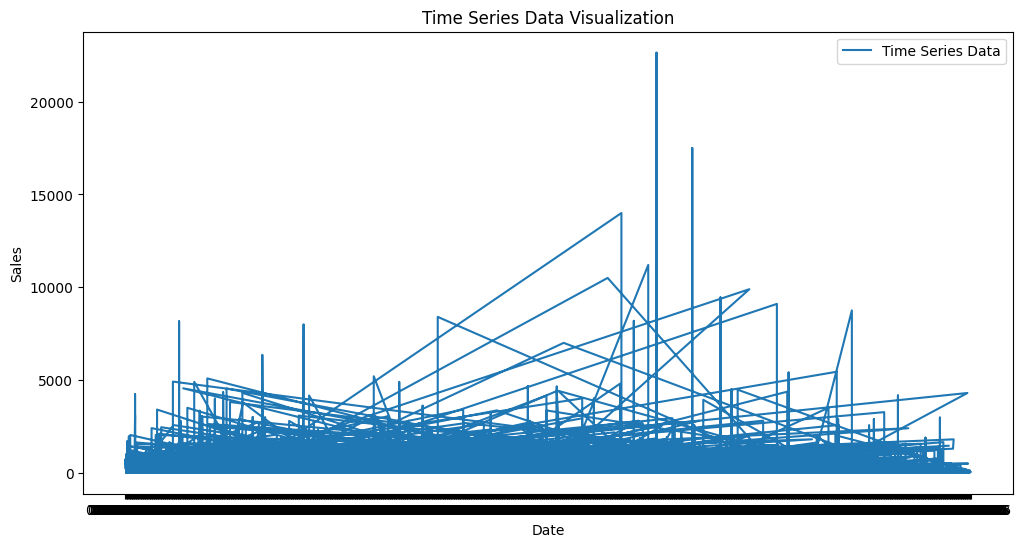


ADF Test on Original Data:
ADF Statistic: -98.33555319790369
p-value: 0.0
Critical Values: 1%, -3.4310175185079284
Critical Values: 5%, -2.861835002806603
Critical Values: 10%, -2.566927024865997

ADF Test on Differenced Data:
ADF Statistic: -27.771478009943554
p-value: 0.0
Critical Values: 1%, -3.431020117870562
Critical Values: 5%, -2.8618361514380988
Critical Values: 10%, -2.566927636285001


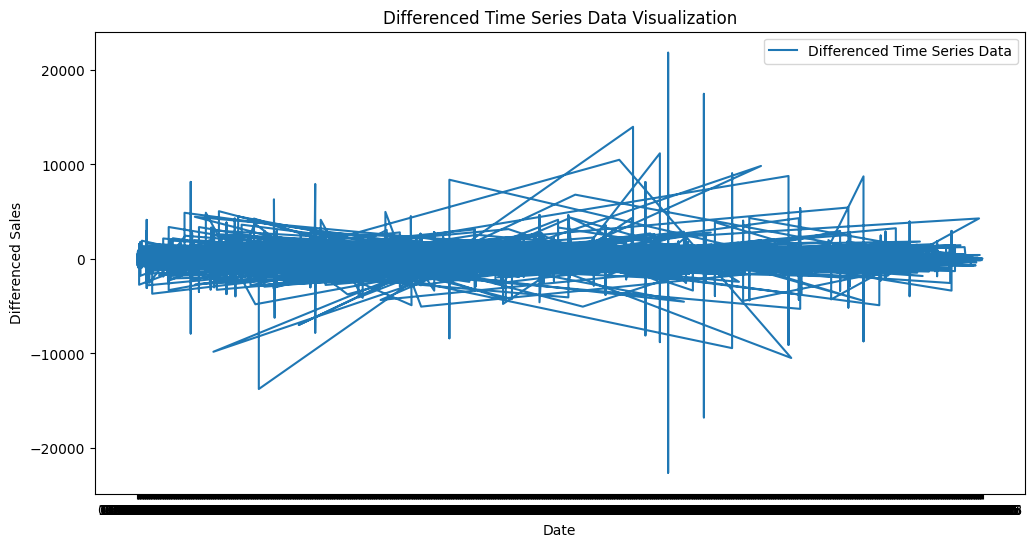

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



ARIMA Model Summary:
                                SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                 7840
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -61583.701
Date:                Mon, 29 Jul 2024   AIC                         123173.402
Time:                        15:14:01   BIC                         123194.302
Sample:                             0   HQIC                        123180.563
                               - 7840                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0161      0.011      1.427      0.154      -0.006       0.038
ma.L1         -1.0000      0.008   -127.131      0.000      -1.015      -0.985
sigma2      3.897e+05   3021.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


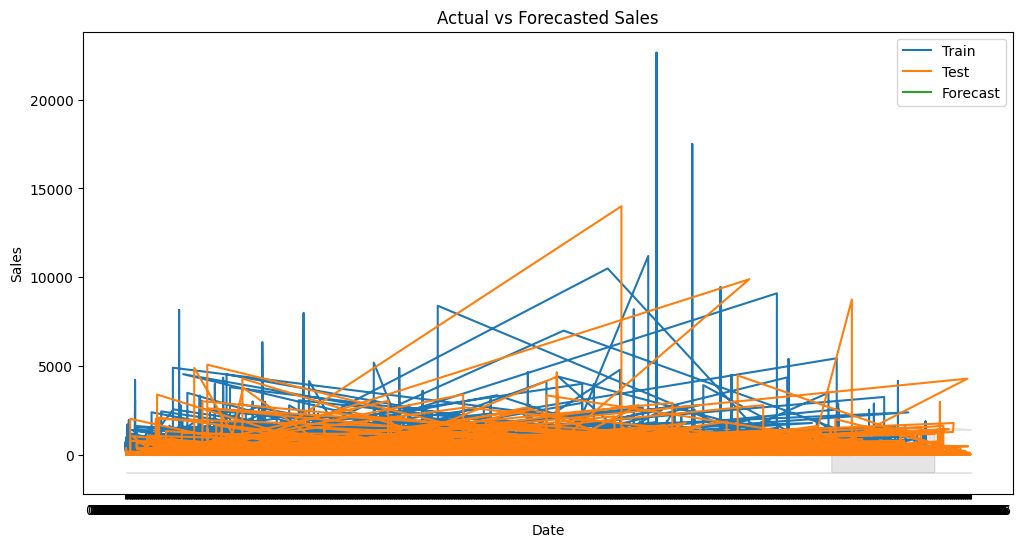


Mean Squared Error (MSE) of the Forecast: 404245.95755652944


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load the dataset (assuming the dataset is in CSV format)
data = pd.read_csv('train.csv', index_col='Order Date', parse_dates=True)

# Display the first few rows of the dataset
print("First few rows of the dataset:\n", data.head())

# Check for missing values
print("\nMissing values before preprocessing:\n", data.isnull().sum())

# Fill missing values (if any) using forward fill method
data = data.fillna(method='ffill')
print("\nMissing values after preprocessing:\n", data.isnull().sum())

# Display column names to ensure correct usage
print("\nColumn names in the dataset:", data.columns)

# Check if 'Sales' column exists, otherwise use the first column
sales_column = 'Sales' if 'Sales' in data.columns else data.columns[0]
print(f"\nUsing '{sales_column}' as the target column.")

# Ensure the sales column is of numeric type
data[sales_column] = pd.to_numeric(data[sales_column], errors='coerce')

# Visualize the time series data
plt.figure(figsize=(12, 6))
plt.plot(data[sales_column], label='Time Series Data')
plt.title('Time Series Data Visualization')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Function to perform the Augmented Dickey-Fuller test for stationarity
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print(f'Critical Values: {key}, {value}')

# Perform the ADF test on the original data
print("\nADF Test on Original Data:")
adf_test(data[sales_column])

# If the series is non-stationary, apply differencing
data_diff = data[sales_column].diff().dropna()

# Perform the ADF test on the differenced data
print("\nADF Test on Differenced Data:")
adf_test(data_diff)

# Visualize the differenced time series data
plt.figure(figsize=(12, 6))
plt.plot(data_diff, label='Differenced Time Series Data')
plt.title('Differenced Time Series Data Visualization')
plt.xlabel('Date')
plt.ylabel('Differenced Sales')
plt.legend()
plt.show()

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data[sales_column][:train_size], data[sales_column][train_size:]

# Fit the ARIMA model
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

# Summary of the model
print("\nARIMA Model Summary:\n", model_fit.summary())

# Forecast the future values
forecast_results = model_fit.get_forecast(steps=len(test))
forecast = forecast_results.predicted_mean
conf_int = forecast_results.conf_int()

# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame({'Forecast': forecast}, index=test.index)

# Plot the actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast_df, label='Forecast')
plt.fill_between(forecast_df.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='k', alpha=0.1)
plt.title('Actual vs Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Calculate and print the mean squared error (MSE) of the forecast
mse = mean_squared_error(test, forecast)
print(f"\nMean Squared Error (MSE) of the Forecast: {mse}")
